In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import env

In [56]:
tips = sns.load_dataset('tips')

tips.dtypes


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [57]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


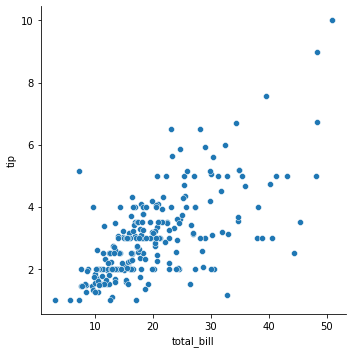

In [58]:
sns.relplot(x='total_bill', y='tip', data=tips)


Text(10.049999999999997, 0.5, 'Tip ($)')

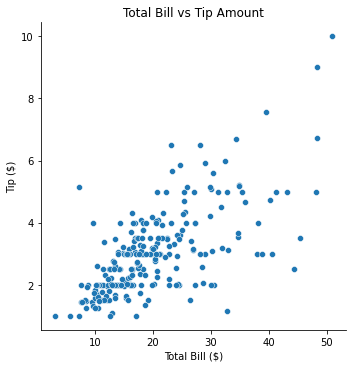

In [59]:
sns.relplot(x='total_bill', y='tip', data=tips)
plt.title('Total Bill vs Tip Amount')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')


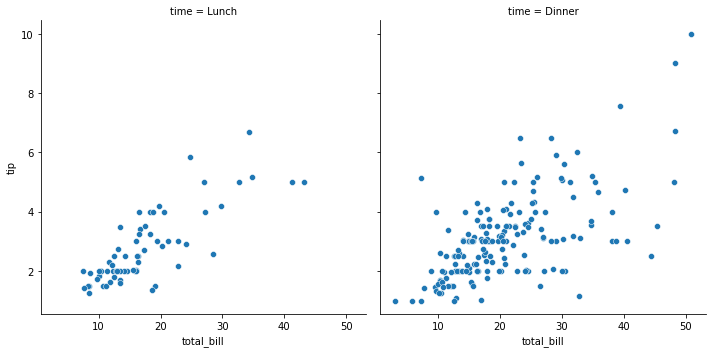

In [60]:
sns.relplot(x='total_bill', y='tip', col='time', data=tips)


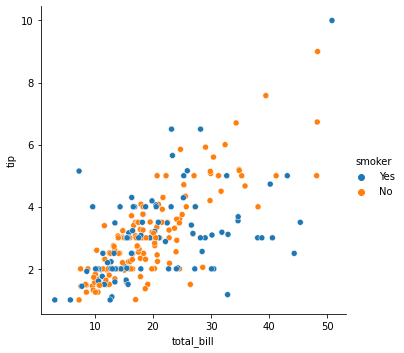

In [61]:
sns.relplot(x='total_bill', y='tip', hue='smoker', data=tips)


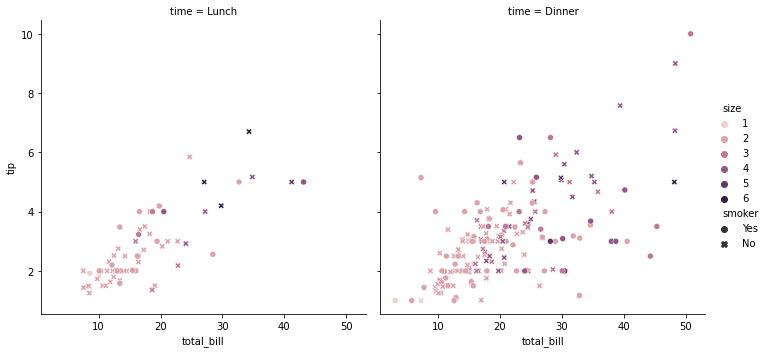

In [62]:
sns.relplot(x='total_bill', y='tip', col='time', hue='size', style='smoker', data=tips)


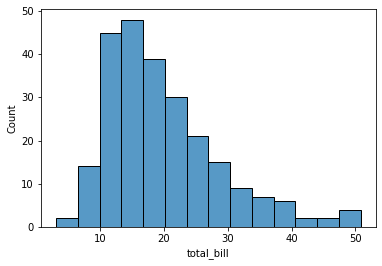

In [63]:
sns.histplot(tips.total_bill)
plt.show()


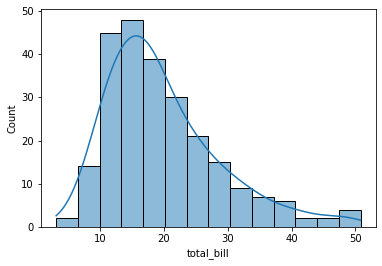

In [64]:
sns.histplot(tips.total_bill, kde=True)
plt.show()


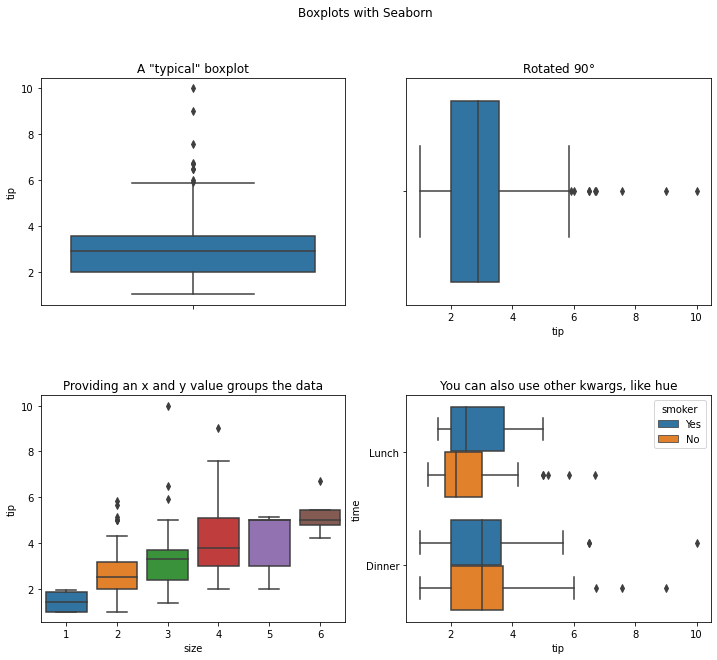

In [65]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(221)
sns.boxplot(data=tips, y='tip')
plt.title('A "typical" boxplot')

plt.subplot(222)
sns.boxplot(data=tips, x='tip')
plt.title('Rotated 90$\degree$')

plt.subplot(223)
sns.boxplot(data=tips, y='tip', x='size')
plt.title('Providing an x and y value groups the data')

plt.subplot(224)
sns.boxplot(data=tips, y='time', x='tip', hue='smoker')
plt.title('You can also use other kwargs, like hue')

plt.subplots_adjust(hspace=0.4)


size,1,2,3,4,5,6
time,,,,,,
Lunch,2,52,5,5,1,3
Dinner,2,104,33,32,4,1


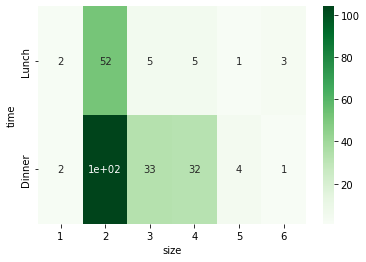

In [66]:
data = pd.crosstab(tips.time, tips['size'])
sns.heatmap(data, annot=True, cmap=plt.cm.Greens)
data


Text(0.5, 1.0, 'tip')

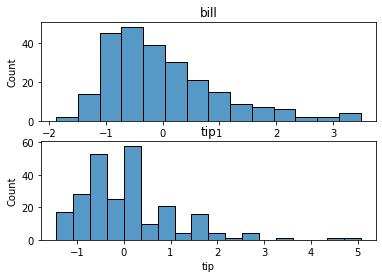

In [67]:
def scale(series):
    return (series - series.mean()) / series.std()

df = pd.DataFrame({'bill': scale(tips.total_bill),
                   'tip': scale(tips.tip)})

plt.subplot(211)
sns.histplot(df.bill)
plt.title('bill')

plt.subplot(212)
sns.histplot(df.tip)
plt.title('tip')


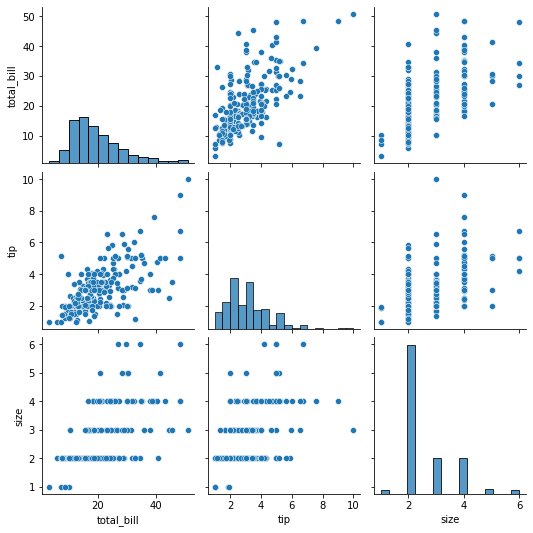

In [68]:
sns.pairplot(tips)



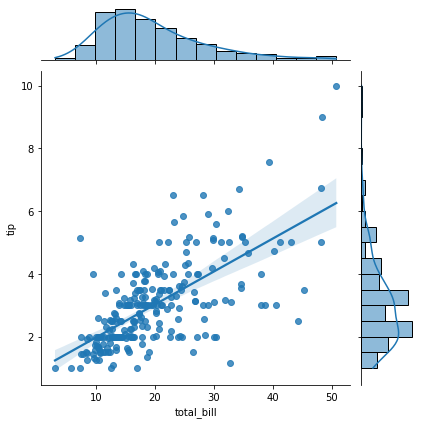

In [69]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')


In [70]:
# # Use the iris database to answer the following quesitons:
iris = sns.load_dataset('iris')

iris.dtypes


# # What does the distribution of petal lengths look like?
# # Is there a correlation between petal length and petal width? 
# Use http://guessthecorrelation.com/ as a hint to how we could 
#     visually determine if a correlation exists between two numeric columns.
# # Would it be reasonable to predict species based on sepal width and sepal length? 
# For this, you'll visualize two numeric columns through the lense of a categorical column.
# # Which features would be best used to predict species?

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

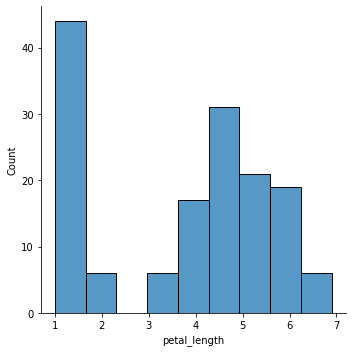

In [71]:
# What does the distribution of petal lengths look like?

sns.displot(iris, x="petal_length")

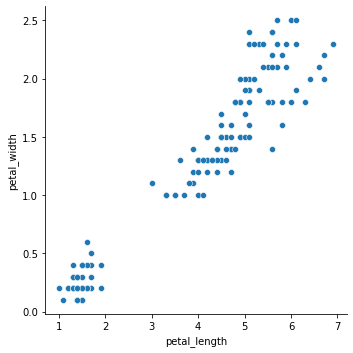

In [72]:
# # Is there a correlation between petal length and petal width? 
# Use http://guessthecorrelation.com/ as a hint to how we could 
#     visually determine if a correlation exists between two numeric columns.


sns.relplot(data=iris, x='petal_length', y='petal_width')
plt.show()


Text(0.5, 1.0, 'Species')

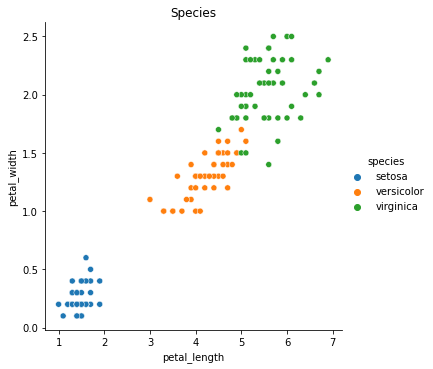

In [73]:
# # Would it be reasonable to predict species based on sepal width and sepal length? 
sns.relplot(x='petal_length',y='petal_width', data=iris,hue='species')
plt.title('Species')

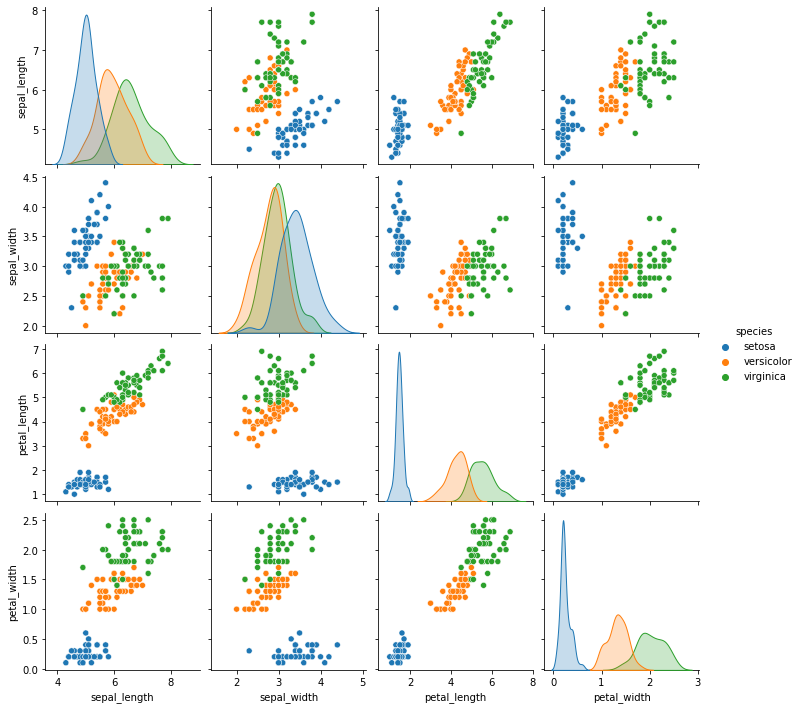

In [74]:
# Which features would be best used to predict species?
sns.pairplot(data=iris, hue='species')
plt.show()

In [75]:
# Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set.
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset.
# What do you notice?

anscombe = sns.load_dataset('anscombe')

anscombe.dtypes



dataset     object
x          float64
y          float64
dtype: object

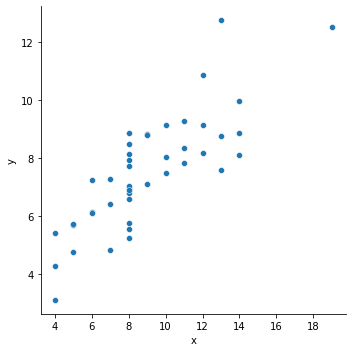

In [76]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.relplot(x='x', y='y', data=anscombe)


In [86]:
# Load the InsectSprays dataset and read it's documentation. 
# Create a boxplot that shows the effectiveness of the different insect sprays.

sprays=data('InsectSprays')
sprays.dtypes



count     int64
spray    object
dtype: object

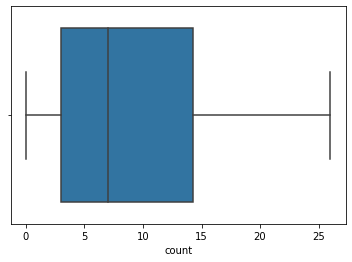

In [85]:
ax = sns.boxplot(x=sprays["count"])

In [87]:
# Load the swiss dataset and read it's documentation. 
# The swiss dataset is available from pydatset rather than seaborn. 
# Create visualizations to answer the following questions:
swiss=data('swiss')
swiss.dtypes
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic.
# (Choose a cutoff point for what constitutes catholic)
# Does whether or not a province is Catholic influence fertility?
# What measure correlates most strongly with fertility?


Fertility           float64
Agriculture         float64
Examination           int64
Education             int64
Catholic            float64
Infant.Mortality    float64
dtype: object

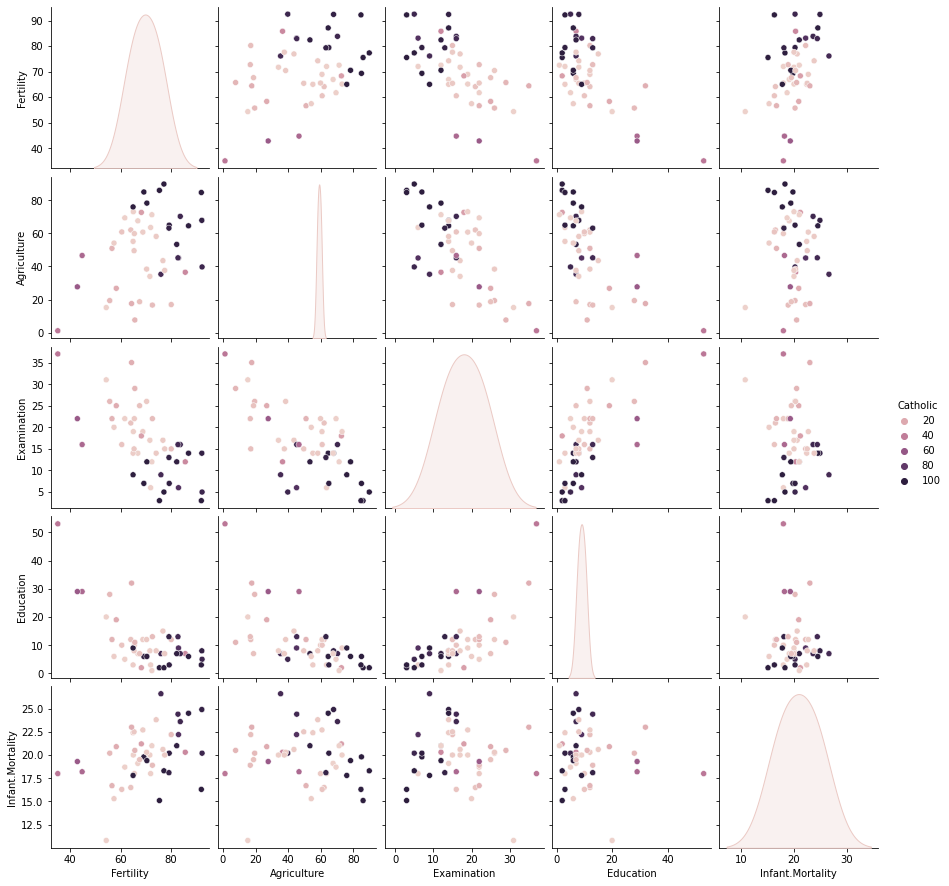

In [89]:
sns.pairplot(data=swiss, hue='Catholic')
plt.show()

In [97]:
# Using the chipotle dataset from the previous exercise, 
# create a bar chart that shows the 4 most popular items and the revenue produced by each.
def get_db_url(user,host,password,schema):
    return f'mysql+pymysql://{user}:{password}@{host}/{schema}'
connect = get_db_url(env.user, env.host, env.password, 'chipotle')

In [98]:
burrito = '''
    SELECT *
    FROM orders
'''

In [99]:
chipolt = pd.read_sql(burrito, connect)


In [101]:
chipolt.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [103]:
chipolt['item_price'] = chipolt.item_price.str.strip('$').astype('float')


In [106]:
popular =chipolt[['item_name', 'quantity', 'item_price']].groupby('item_name', as_index=False).agg({'quantity':'sum', 'item_price':'sum'}).sort_values(by='quantity', ascending=False).head(4)


<AxesSubplot:xlabel='item_price', ylabel='item_name'>

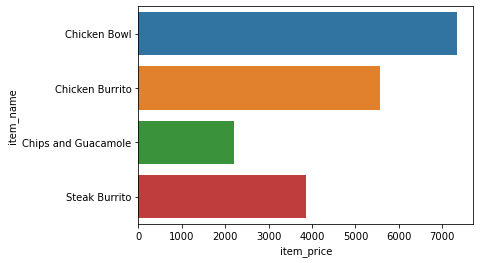

In [108]:
popular=popular.iloc[0:5, ]
sns.barplot(data=popular, y='item_name', x='item_price')


In [ ]:
# Load the sleepstudy data and read it's documentation. 
# Use seaborn to create a line chart of all the individual subject's reaction times 
# and a more prominant line showing the average change in reaction time.